In [6]:
# Load the necessary packages and modules
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
from talib.abstract import MFI
import yfinance as yf

In [3]:
data = yf.download("AAPL", start="2020-05-10", end="2022-09-10")
# high, low, close, volume, timeperiod=14

mfi_data = MFI(data['High'], data['Low'], data['Close'], data['Volume'])
print('mfi_data:',mfi_data)

[*********************100%***********************]  1 of 1 completed
mfi_data: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 46.9235019  44.7344223  53.6100183  55.795839
 65.50345892 64.74282504 66.01841596 67.50061077 63.18186392 58.79296443
 59.27613758 66.32253659 66.20181666 67.7943154  57.40520685 58.61762143
 61.04601234 57.83865908 58.08863816 51.41144132 51.20879168 50.76287468
 57.63191671 65.0131452  64.8777108  64.14057267 64.33555025 69.39886489
 75.06757542 75.94516987 66.49653305 75.77931084 69.51239196 73.42298116
 72.95789868 72.51747934 66.88912483 57.51612458 49.24295606 49.5074773
 43.53366519 42.39134632 49.35088535 54.60801043 65.88848618 66.50846053
 71.7269883  77.16506592 69.50671441 71.09842026 67.97718892 74.71620982
 81.37650534 75.3243125  78.96781082 79.22367529 79.34987691 77.53152224
 78.15008826 79.90451388 72.50585636 72.31214175

In [7]:
data = yf.download("AAPL", start="2020-05-10", end="2022-09-10")
data_mfi = mfi(data['High'], data['Low'], data['Close'], data['Volume'], 7)

[*********************100%***********************]  1 of 1 completed


In [10]:
data_mfi[-10:]

array([60.29537519, 73.33203041, 72.61472149, 72.66799534, 85.6780015 ,
       86.40656889, 85.90570155, 70.29231722, 56.35742768, 45.26949055])

In [4]:
def gain(x):
    return ((x > 0) * x).sum()

def loss(x):
    return ((x < 0) * x).sum()

# Calculate money flow index
def mfi(high, low, close, volume, n=14):
    typical_price = (high + low + close)/3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign
    mf_avg_gain = signed_mf.rolling(n).apply(gain, raw=True)
    mf_avg_loss = signed_mf.rolling(n).apply(loss, raw=True)
    return (100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))).to_numpy()

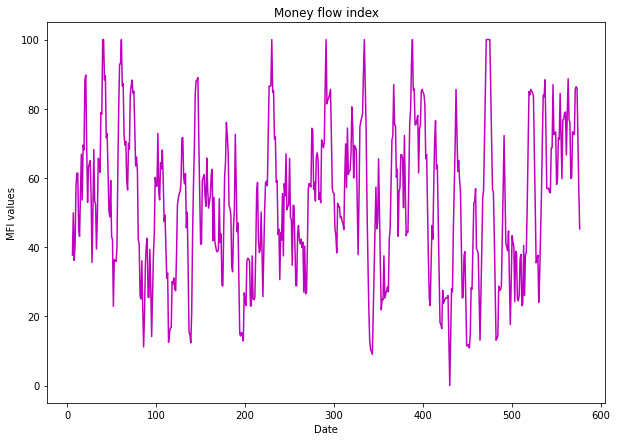

In [13]:
fig = plt.figure(figsize=(10, 7))
plt.title('Money flow index')
plt.xlabel('Date')
plt.ylabel('MFI values')

plt.plot(data_mfi, 'm', label='MFI')

[*********************100%***********************]  1 of 1 completed


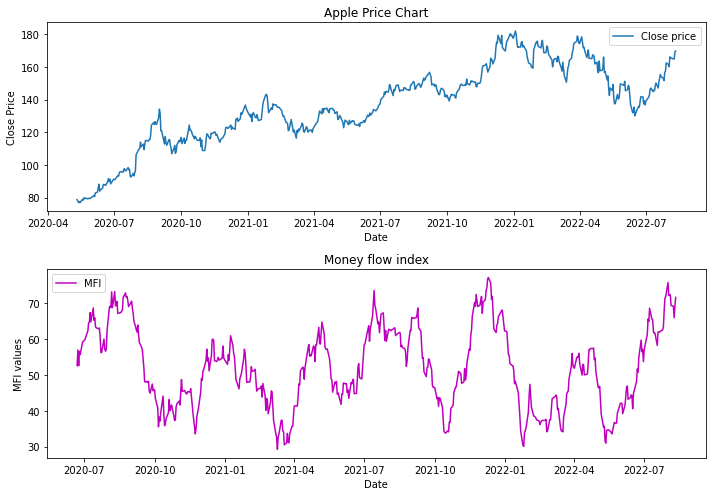

In [8]:

# Retrieve the Apple Inc. data from Yahoo finance
data = yf.download("AAPL", start="2020-05-10", end="2022-09-10")

data['MFI'] = mfi(data['High'], data['Low'], data['Close'], data['Volume'], 7)

# Plotting the Price Series chart and the MFI below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('Apple Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Money flow index')
plt.xlabel('Date')
plt.ylabel('MFI values')

plt.plot(data['MFI'], 'm', label='MFI')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
data

,Open,High,Low,Close,Adj Close,Volume,MFI
Date,,,,,,,
2020-05-11,77.025002,79.262497,76.809998,78.752502,77.673141,145946400,NaN
2020-05-12,79.457497,79.922501,77.727501,77.852501,76.785477,162301200,NaN
2020-05-13,78.037498,78.987503,75.802498,76.912498,75.858368,200622400,NaN
2020-05-14,76.127502,77.447502,75.382500,77.385002,76.324387,158929200,NaN
2020-05-15,75.087502,76.974998,75.052498,76.927498,75.873154,166348400,NaN
...,...,...,...,...,...,...,...
2022-08-05,163.210007,165.850006,163.000000,165.350006,165.350006,56646600,69.353727
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.869995,60276900,69.106186
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.919998,63135500,65.911624
